# 4. Interactivity

## 4a. Plotly

**Installation**: run the following commands in a terminal (requires [Node](https://nodejs.org/en/download/)):
 1. `export NODE_OPTIONS=--max-old-space-size=4096` (replace `export` with `set` on Windows)
 2. `jupyter labextension install @jupyter-widgets/jupyterlab-manager@1.1 jupyterlab-plotly@1.5.1 plotlywidget@1.5.1 --no-build`
 3. `jupyter lab build`
 
See `1c-extra.ipynb` if you run into issues.

**Table of contents**
- Basic charts
- Why interactive?
- Layouting
- Styling
- Geographical charts
- Advanced charts
- 3D charts
- Further reading

This workshop will only showcase the most useful functionalities, or those that cannot (easily) be achieved through matplotlib. Specific links for additional information are provided under each subsection. For a general description of charts and their usage, refer to the previous workshop.

---

In [1]:
import plotly.graph_objects as go

In [2]:
import pandas as pd
import numpy as np

Note: the following cell is just my personal preference, feel free to skip. Read more about theming in [the docs](https://plot.ly/python/templates/).

In [3]:
# Change from the default seaborn-esque theme to a lighter one.
import plotly.io as pio
pio.templates.default = 'plotly_white'

### Basic charts

Pretty much every chart you can make using `matplotlib`, you can make using `plotly`

#### Line & Scatter

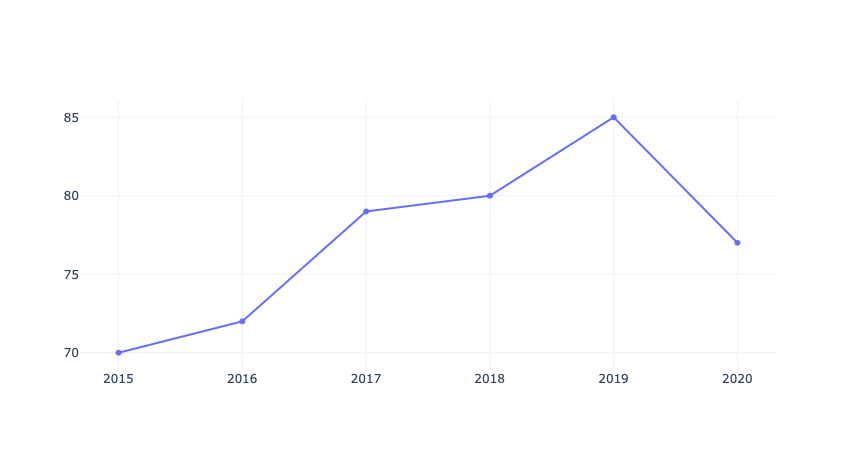

In [4]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
price = [  70,   72,   79,   80,   85,   77]

go.Figure(go.Scatter(x=years, y=price))

Slightly confusingly, `go.Scatter` produces a line plot by default (markers with straight connections). 
To produce an actual scatter plot, provide the `mode='markers'` argument:

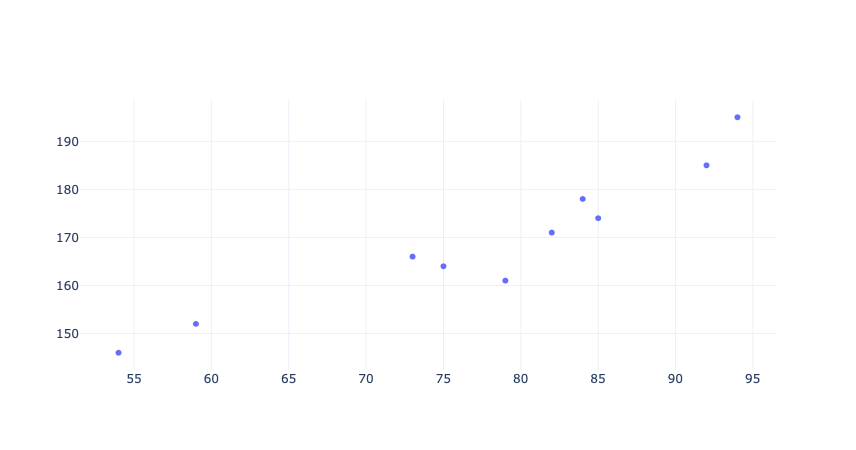

In [5]:
height = [146, 152, 161, 164, 166, 171, 174, 178, 185, 195]
weight = [ 54,  59,  79,  75,  73,  82,  85,  84,  92,  94]

go.Figure(go.Scatter(x=weight, y=height, mode='markers'))

See [the docs](https://plot.ly/python/filled-area-plots/) for filled area charts.

#### Bar

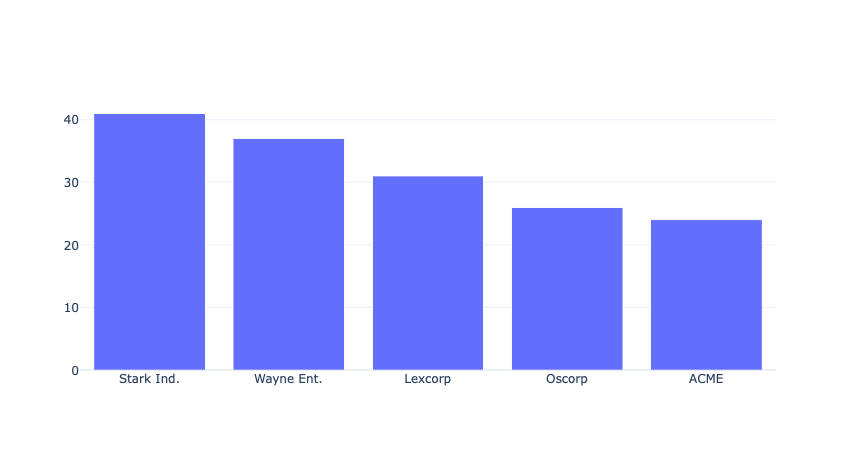

In [6]:
companies = ['Stark Ind.', 'Wayne Ent.', 'Lexcorp', 'Oscorp', 'ACME']
valuation = [41, 37, 31, 26, 24]

go.Figure(data=go.Bar(x=companies, y=valuation))

#### Multiple traces

You can also mix trace types:

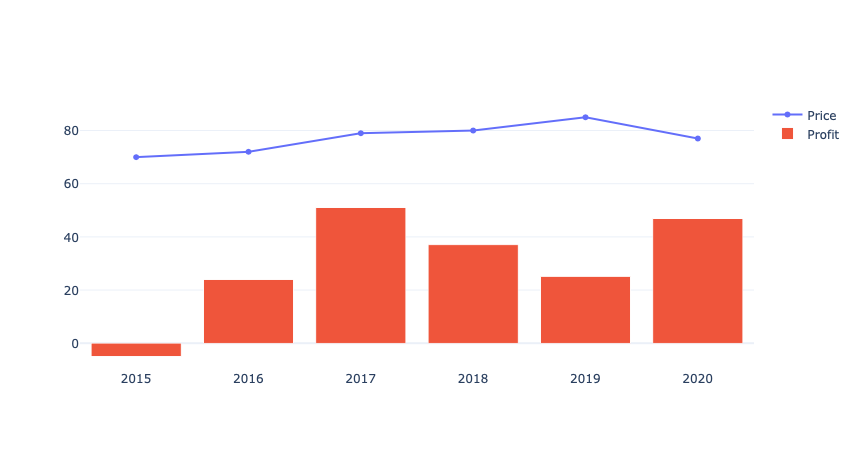

In [7]:
years  = [2015, 2016, 2017, 2018, 2019, 2020]
price  = [  70,   72,   79,   80,   85,   77]
profit = [  -5,   24,   51,   37,   25,   47]

go.Figure([
    go.Scatter(x=years, y=price,  name='Price'),
    go.Bar    (x=years, y=profit, name='Profit')
])

Stacked bar charts (horizontal orientation):

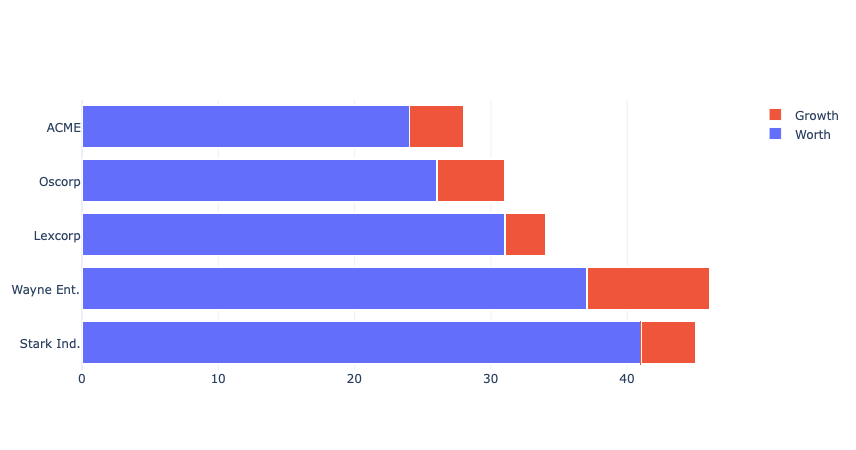

In [8]:
potential = [ 4,  9,  3,  5,  4]

fig = go.Figure([
    go.Bar(orientation='h', y=companies, x=valuation, name='Worth'),
    go.Bar(orientation='h', y=companies, x=potential, name='Growth')
])

fig.update_layout(barmode='stack')

Check [the docs](https://plot.ly/python/bar-charts/) for grouped, and other variations of bar charts, and [horizontal bar charts](https://plot.ly/python/horizontal-bar-charts/).

### Why make it interactive?

You might have noticed that we essentially replicating the same charts we already know how to make in matplotlib. Why bother learning a new tool to achieve the same results?

In [9]:
import plotly.express as px

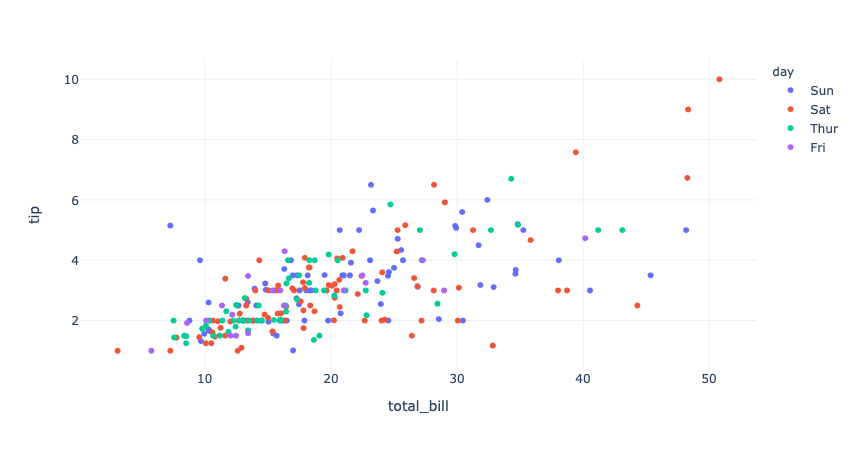

In [10]:
fig = px.scatter(
    px.data.tips(),
    x='total_bill',
    y='tip',
    color='day',
)
fig.show(config={'scrollZoom': True})

We jumped ahead a couple of sections, but the above chart helps illustrate one of the main advantages of an interactive chart: being able to better explore the data by filtering it out:
 - focus on a specific range: only on bills above 40, or tips above 5, or both
 - focus on a subset of data points: only on weekends (click _Thur_ and _Fri_) inside the legend to the right, or just Sunday (double click _Sun_ in the legend)
 - zoom in/out with the scroll wheel (enabled by the last line in the above cell) or the _plus/minus_ buttons on the top right menu bar
 - reset the view (using the _home_) button on the top right menu bar, and explore another view of the data, without having to plot again
 
The second main advantage is being able to provide additional information through hover or click events, which are explored later.

---

To save the current view as a static image, click the camera button.

Much more so than static ones, plotly charts take up a lot of memory, making the notebook significantly laggy when many of them are present.

### Layouting

#### Plot and axes titles

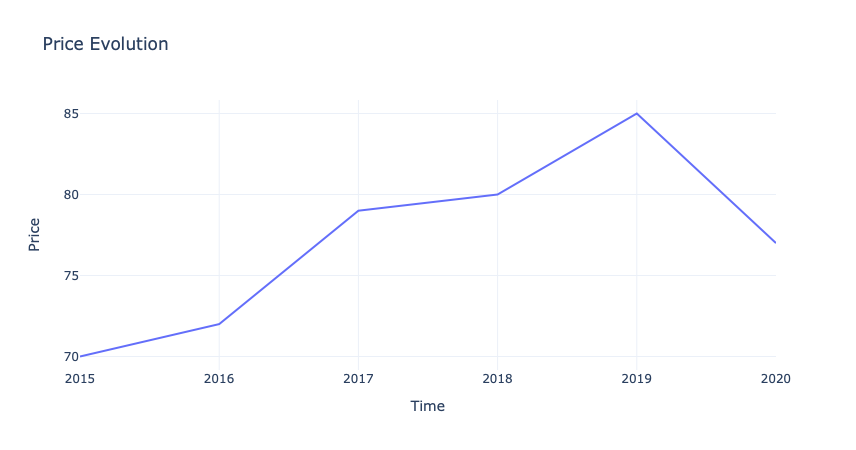

In [11]:
fig = go.Figure(go.Scatter(x=years, y=price, mode='lines'))
fig.update_layout(
    title='Price Evolution',
    xaxis_title='Time',
    yaxis_title='Price',
)

#### Axes ticks

Change the tick label format:

In [12]:
from datetime import datetime

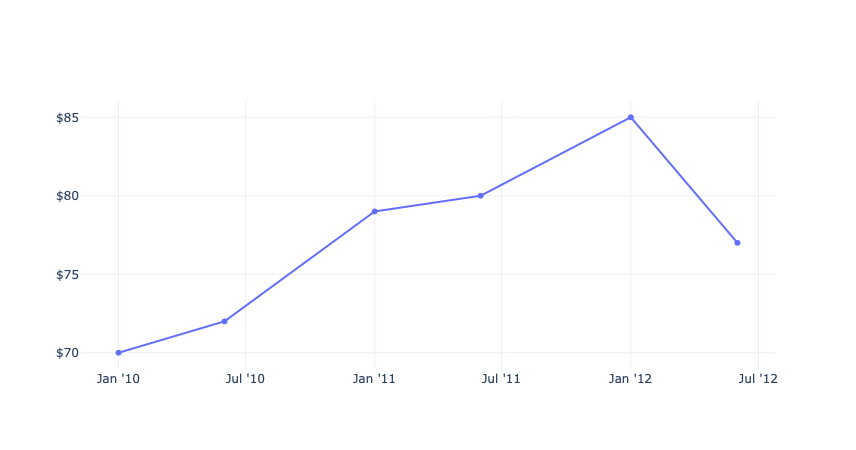

In [13]:
dates = [
    # note that they are actual datetime objects
    datetime(year=2010, month=1, day=1),
    datetime(year=2010, month=6, day=1),
    datetime(year=2011, month=1, day=1),
    datetime(year=2011, month=6, day=1),
    datetime(year=2012, month=1, day=1),
    datetime(year=2012, month=6, day=1),
]
fig = go.Figure(go.Scatter(x=dates, y=price))
fig.update_layout(
    yaxis_tickformat='$d',
    xaxis_tickformat="%b '%y"  # for datetime(year=2010, month=1, day=1), %b turns into Jan and %y turns into 10
)

[strftime.org](https://strftime.org) is a wonderful reference for string-time formatting in python (and other languages as well).

---

Manually define tick frequency:

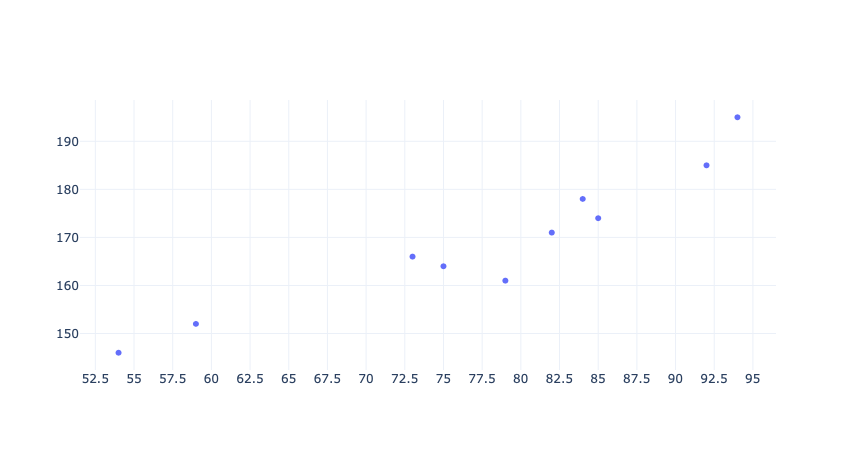

In [14]:
fig = go.Figure(go.Scatter(x=weight, y=height, mode='markers'))

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick=2.5,  # maintain a distance of 2.5 between ticks
    )
)

Manually define tick labels:

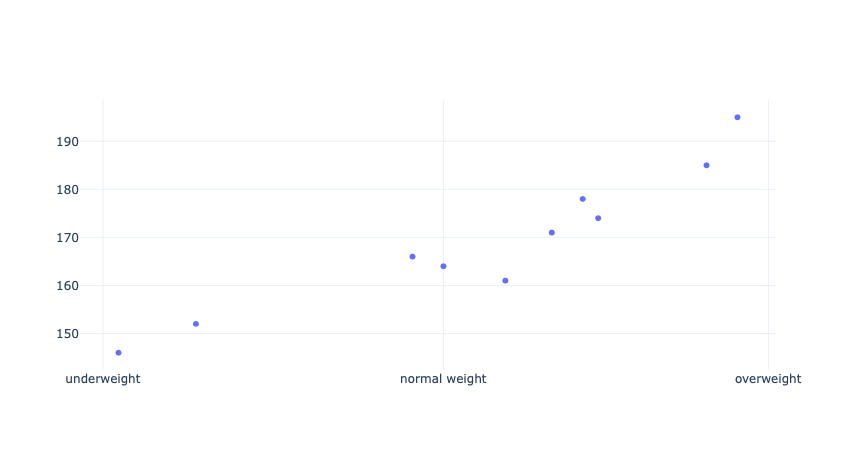

In [15]:
fig = go.Figure(go.Scatter(x=weight, y=height, mode='markers'))

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[53, 75, 96],
        ticktext=['underweight', 'normal weight', 'overweight'],
    )
)

Please note that the above under/overweight classifications are purely didactical, not rooted in any medical reality.

#### Hover tooltip

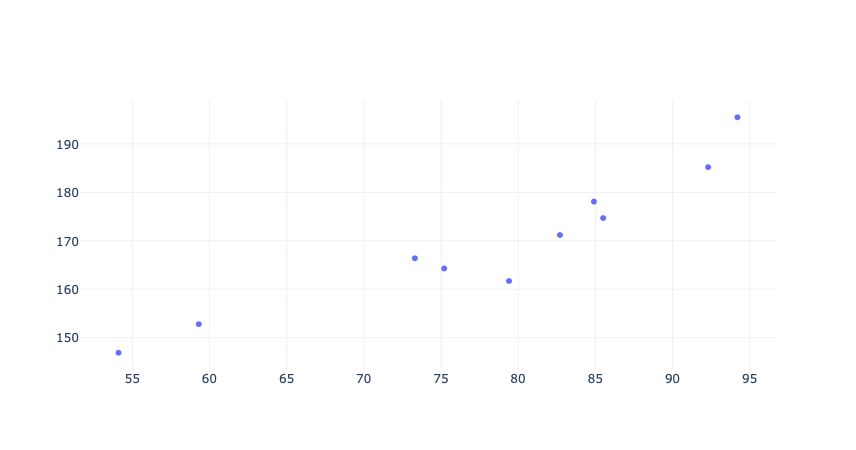

In [16]:
height = [146.9, 152.8, 161.7, 164.3, 166.4, 171.2, 174.7, 178.1, 185.2, 195.5]
weight = [ 54.1,  59.3,  79.4,  75.2,  73.3,  82.7,  85.5,  84.9,  92.3,  94.2]
names  = ['Ana', 'Bob', 'Chris', 'Dave', 'Ed', 'Fred', 'George', 'Hank', 'Ivy', 'Jake']

# Some lightweight html styling is allowed
fig = go.Figure(go.Scatter(
    x=weight, 
    y=height, 
    mode='markers', 
    text=names, 
    hovertemplate='<b>%{text}</b> weighs %{x} kg<br>'
                  'and is %{y:.2f} cm tall', 
    name='',  # we'll see what's up with this in a bit
))

# Note that the hoverformat is independent of the tickformat
fig.update_layout(
    yaxis_tickformat='d',  # no decimals
)

For dates, use the syntax `%{y| %b %Y}`

See [the docs](https://plot.ly/python/hover-text-and-formatting/) for more formatting examples.

#### Annotations

Datapoint text labels are much easier to display compared to matplotlib:

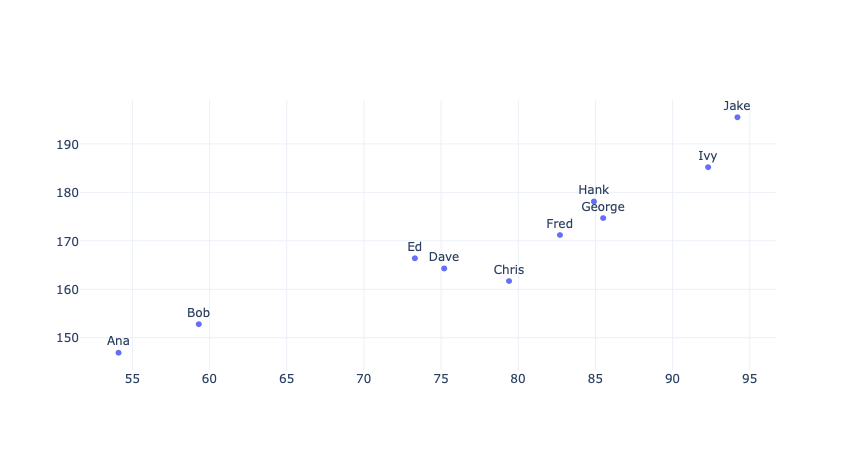

In [17]:
go.Figure(go.Scatter(
    x=weight, y=height,
    text=names, textposition='top center',
    mode='markers+text',
))

See [the docs](https://plot.ly/python/text-and-annotations/) for more examples of text annotations.

---

Shapes and chart annotations can be used to:
 - highlight a specific range (like the red rectangle on the right does)
 - highlight an area (like the green circle does)
 - draw attention to an area (like the _Special_ arrow does)

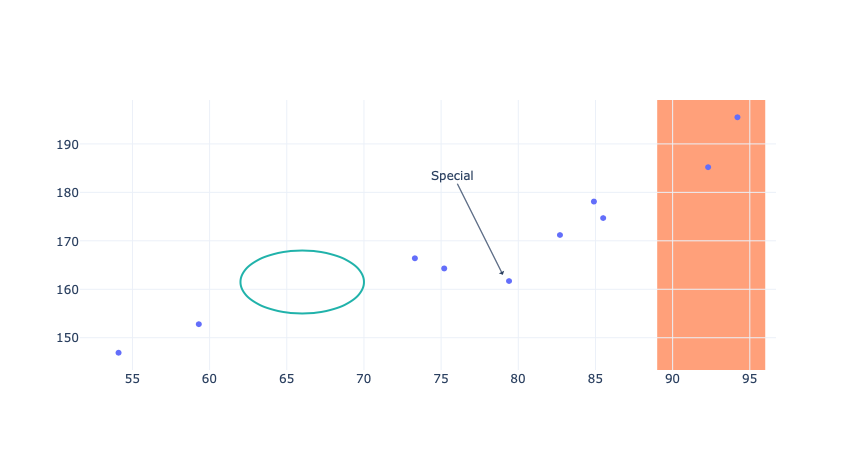

In [18]:
fig = go.Figure(go.Scatter(x=weight, y=height, mode='markers'))
fig.update_layout(
    shapes=[
        dict(
            type='rect',
            fillcolor='LightSalmon',
            layer='below',
            line_width=0,


            # horizontal coordinates reference the x axis (around 55-95)
            xref='x', x0=89, x1=96,

            # vertical coordinates reference the plot paper [0, 1]
            yref='paper', y0=0, y1=1,
        ),

        dict(
            type='circle',
            line_color='LightSeaGreen',

            xref='x', yref='y',
            x0=62, y0=155,
            x1=70, y1=168,
        )
    ],
    
    annotations=[
        dict(
            text='Special',
            showarrow=True,
            arrowhead=1,  # shape of the arrow head

            xref='x', yref='y',
            x=79, y=163,

            # how much to draw back the arrow
            ax=-50, ay=-100,
        ),
    ]
)

See the docs for more uses of [shapes](https://plot.ly/python/shapes/) or even [images](https://plot.ly/python/images/).

#### Figure size

The _paper background_ color is set grey to easily identify the margins:

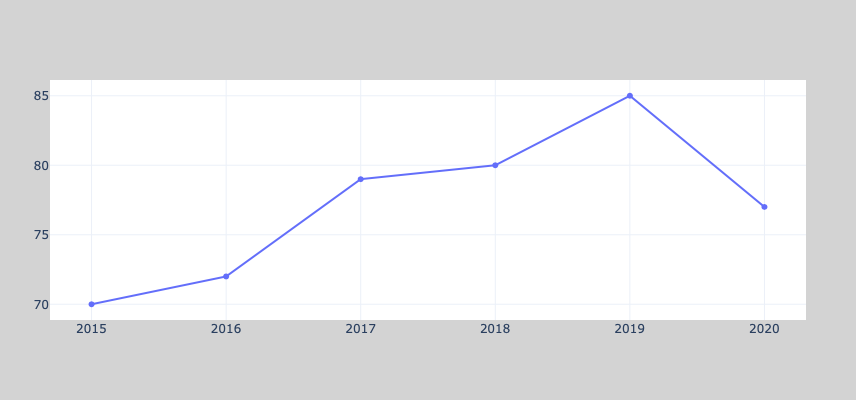

In [19]:
fig = go.Figure(go.Scatter(x=years, y=price))
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    margin=dict(
        l=50,  # left
        r=50,  # right
        b=80,  # bottom
        t=80,  # top
    ),
    paper_bgcolor='lightgrey',
)

`fig.update_yaxes(automargin=True)` makes it so that tick labels are not cut off by axis labels.

---

If you wish to remove buttons from the mode bar (buttons on the top right):

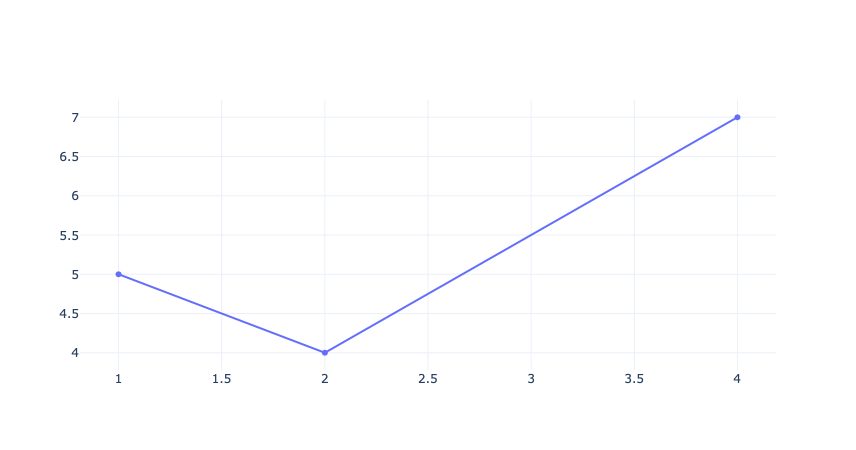

In [20]:
fig = go.Figure(
    go.Scatter(x=[1, 2, 4], y=[5, 4, 7])
)
fig.show(config=dict(
    displaylogo=False,
    modeBarButtonsToRemove=['toggleSpikelines']
))

#### Subplots

In [21]:
from plotly.subplots import make_subplots

Subplots can vary in size and share axes:

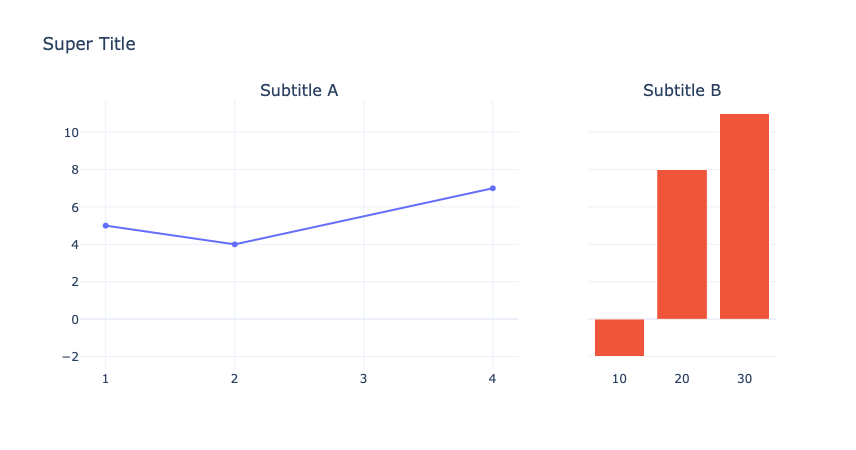

In [22]:
fig = make_subplots(
    rows=1, cols=2, 
    column_widths=[.7, .3],
    subplot_titles=['Subtitle A', 'Subtitle B'],
    shared_yaxes=True,  # note that the axis' ticks will only appear on the left
)

fig.add_trace(
    go.Scatter(x=[1, 2, 4], y=[5, 4, 7]),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=[10, 20, 30], y=[-2, 8, 11]),
    row=1, col=2
)

fig.update_layout(title='Super Title', showlegend=False)

See [the docs](https://plot.ly/python/subplots/) for details on how to make more intricate subplot layouts. [This page](https://plot.ly/python/subplot-charts/) contains additional articles on subplots.

### Styling

#### Fonts

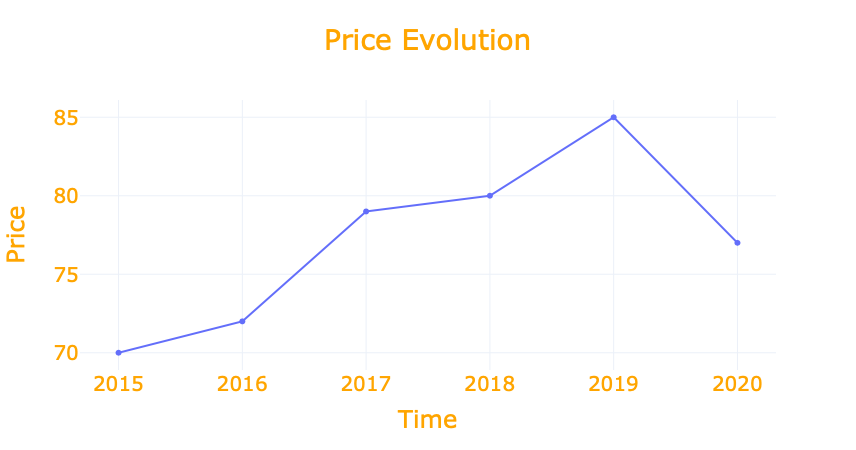

In [23]:
fig = go.Figure(go.Scatter(x=years, y=price))
fig.update_layout(
    title=dict(
        text='Price Evolution',
        x=.5  # center horizontally
    ),
    xaxis_title='Time',
    yaxis_title='Price',
    font=dict(  # note that this font applies to all texts
        color='orange',
        size=20
    )
)

#### Markers and lines

Semi-transparent markers can make a large number of them legible:

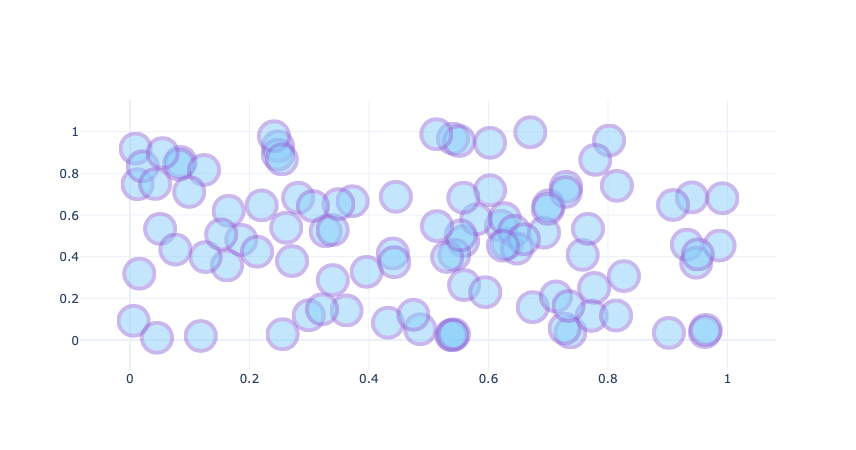

In [24]:
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)

go.Figure(go.Scatter(
    x=x, y=y,
    mode='markers',
    marker=dict(
        color='LightSkyBlue',  # or even white
        size=30,
        opacity=.5,
        
        line=dict(
            color='MediumPurple',
            width=4,
        )
    )
))

See the docs for more [marker styling](https://plot.ly/python/marker-style/) and [line styling](https://plot.ly/python/line-charts/) examples.

#### Colors

See the docs for more information on:
 - [continuous color scales](https://plot.ly/python/builtin-colorscales/)
 - [discrete colors](https://plot.ly/python/discrete-color/)
 - [more examples of usage](https://plot.ly/python/colorscales/)

### Geographical charts

A choropleth map is a geographical map in which areas are shaded in proportion to a variable. Similar to a heatmap, but for irregular areas:

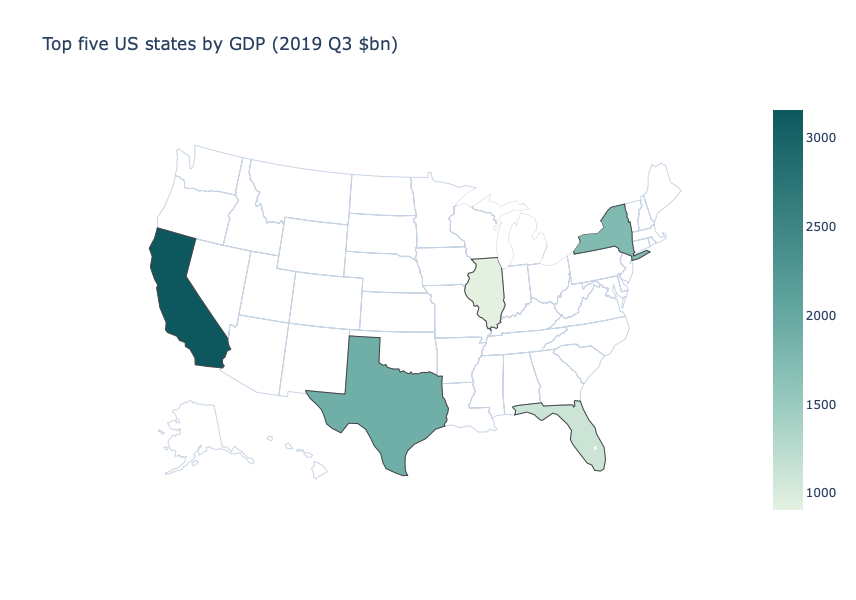

In [25]:
fig = go.Figure(go.Choropleth(
    locations=['CA', 'TX', 'NY', 'FL', 'IL'], 
    z=[3155, 1896, 1741, 1101, 902],
    locationmode='USA-states',
    colorscale='Mint'
))
fig.update_layout(
    title_text='Top five US states by GDP (2019 Q3 $bn)',
    geo_scope='usa',
    height=600,
)

Note: an ineffective way of displaying this information would be a [Bubble map](https://plot.ly/python/bubble-maps/). See this [great visualization] which would have benefited greatly from a choropleth treatment.

See [the docs](https://plot.ly/python/choropleth-maps/) for more variations.

---

We can zoom down to district level (and show a diverging colorscale):

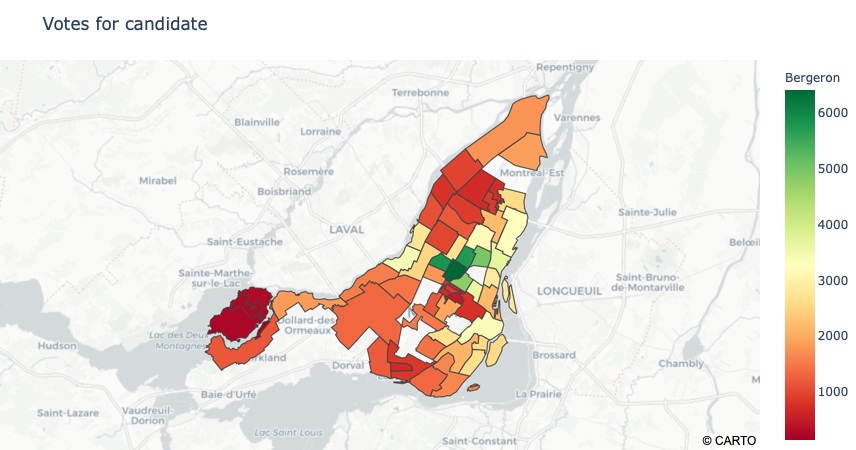

In [26]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(
    # see these two dataframes for expected format
    px.data.election(),
    geojson=px.data.election_geojson(),
    
    locations='district',
    featureidkey='properties.district',
    color='Bergeron',  # specify column to be used as z axis
    
    mapbox_style='carto-positron',  # base layer
    color_continuous_scale='RdYlGn',
    
    # specify the initial map view
    center=dict(lat=45.5517, lon=-73.7073), 
    zoom=9, 
)
fig.update_layout(
    margin=dict(r=0, l=0, b=0),
    title_text='Votes for candidate'
)

See [the docs](https://plot.ly/python/county-choropleth/) for county-level granularity.

---

We can zoom out, and show a density plot on terrain data:

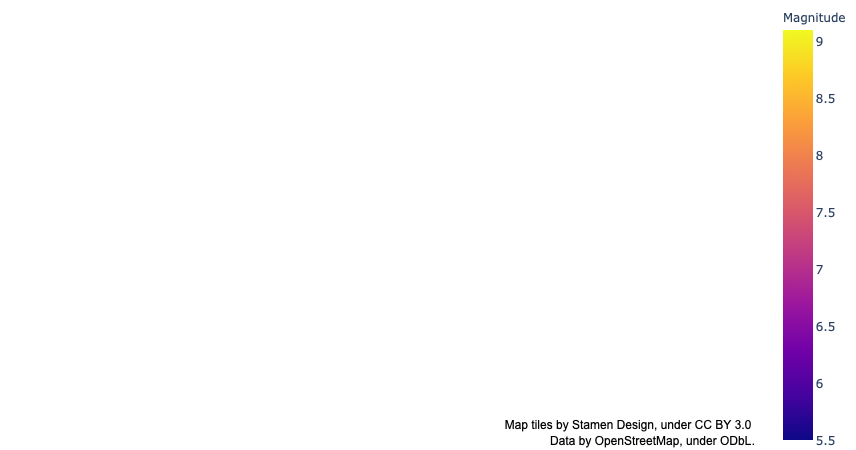

In [27]:
fig = px.density_mapbox(
    pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv'), 
    lat='Latitude', lon='Longitude', z='Magnitude',  # columns in the above dataset
    
    radius=5,
    
    # initial view
    center=dict(lat=0, lon=180), zoom=1,
    mapbox_style='stamen-terrain'
)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

See [the docs](https://plot.ly/python/mapbox-density-heatmaps/) for more information on density maps.

---

We can also localize heatmap centers to single points:

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')\
    .rename(columns={'cnt': 'arrivals'})\
    .sort_values(by='arrivals', ascending=False)\
    .head(20)

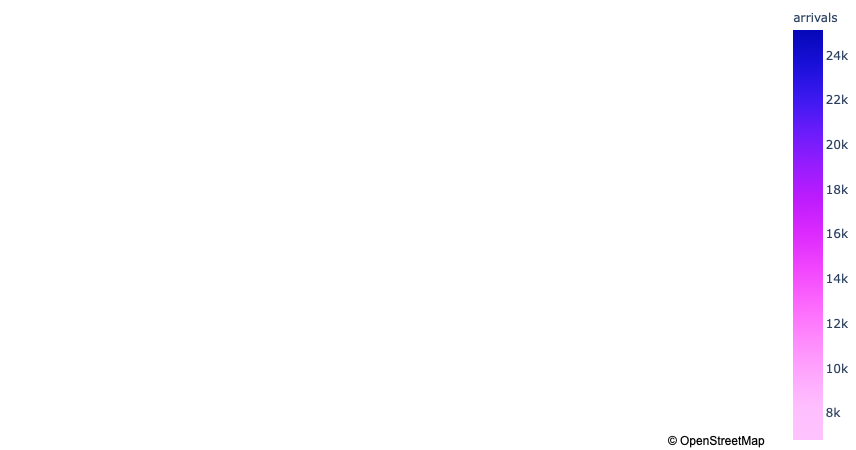

In [29]:
fig = px.scatter_mapbox(
    df, 
    lat='lat', lon='long', color='arrivals',
    
    hover_name='city', 
    hover_data=['state', 'airport'],
        
    color_continuous_scale='Plotly3_r',  # same as with matplotlib, append _r to reverse it
    zoom=3,    
)

fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    mapbox_style='open-street-map'
)

See [the docs](https://plot.ly/python/scattermapbox/) for more configuration options.

---

In [30]:
airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')

In [31]:
list(flight_paths.iterrows())[0]

(0,
 start_lat     32.896
 start_lon   -97.0372
 end_lat      35.0402
 end_lon     -106.609
 airline           AA
 airport1         DFW
 airport2         ABQ
 cnt              444
 Name: 0, dtype: object)

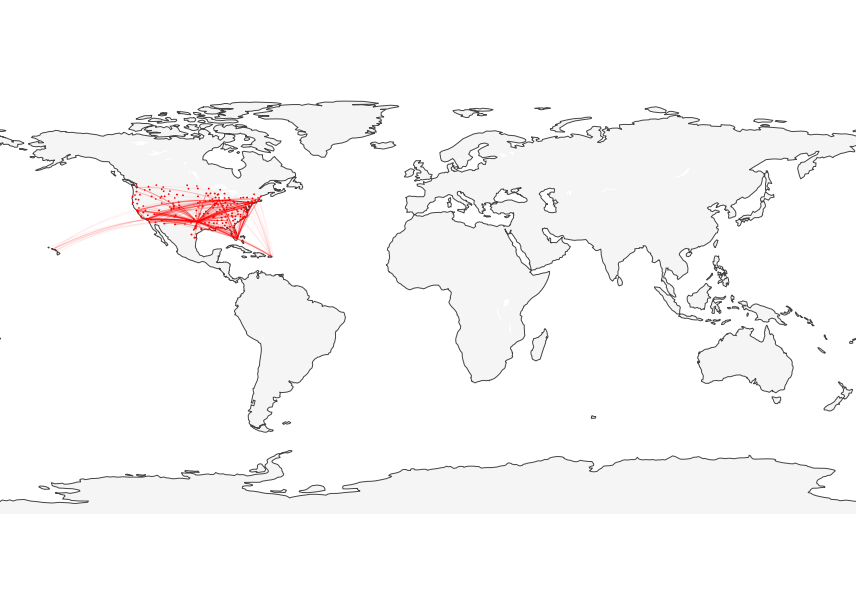

In [32]:
fig = go.Figure(
    # one point for each airport
    go.Scattergeo(
        locationmode='USA-states',
        lat=airports.lat,
        lon=airports.long,
        hoverinfo = 'text',
        text=airports.airport,
        mode='markers',
        marker=dict(
            size=2,
            color='rgb(255, 0, 0)',
            line=dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        )
    )
)

# one line for each pair of airports having a flight
max_flight = float(flight_paths.cnt.max())
for _, row in flight_paths.iterrows():
    fig.add_trace(
        go.Scattergeo(
            lon=(row.start_lon, row.end_lon),
            lat=(row.start_lat, row.end_lat),
            mode='lines',  locationmode='USA-states',
            line=dict(width=1, color='red'),
            opacity=row.cnt / max_flight,
        )
    )

fig.update_layout(
    showlegend=False,
    geo=dict(
        projection_type='equirectangular',
        showframe=False,
        
        landcolor='rgb(245, 245, 245)',
    ),
    height=600, 
    margin=dict(t=0, b=0, l=0, r=0)
)

Note: no 2D projection of a sphere is perfect. See [this video](https://www.youtube.com/watch?v=kIID5FDi2JQ) for a nice explanation. Some projection methods are better than others, but all are flawed. [This website](https://www.thetruesize.com) allows interactive comparison of the true sizes of countries.

The only entirely faithful representation of the globe would be 3D:

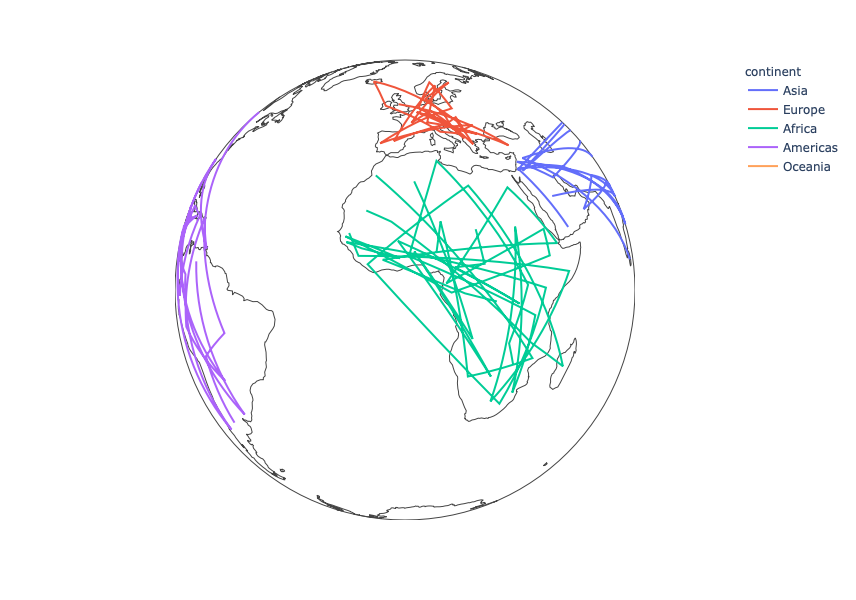

In [33]:
px.line_geo(
    px.data.gapminder().query('year == 2007'), 
    color='continent', # "continent" is a column in the dataframe
    
    locations='iso_alpha',
    projection='orthographic',
    height=600,
)

See [the docs](https://plot.ly/python/lines-on-maps/) for more map line options.

---

See the docs for [more configuration options](https://plot.ly/python/map-configuration/) and [more chart variations](https://plot.ly/python/maps/).

### Advanced charts

Charts that can not be (easily) created in matplotlib/seaborn

#### Funnel

Represent data in sequential stages of a process, showing progressively decreasing values. Highlights steps at which high drops occur. 

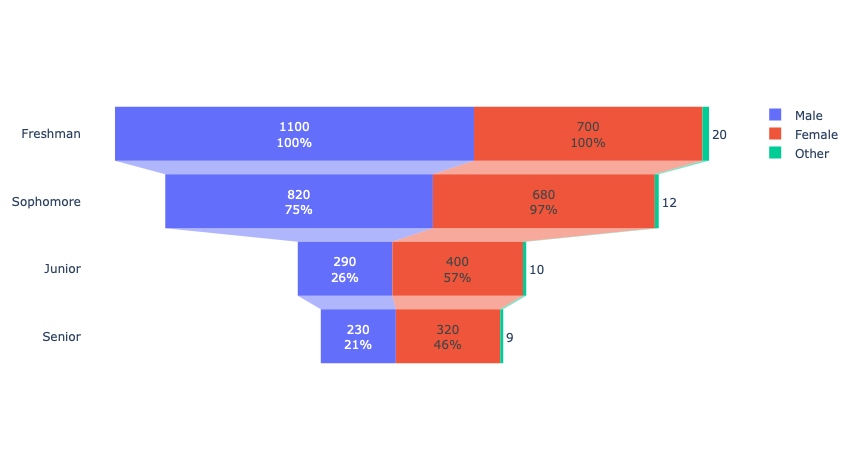

In [34]:
stages = ['Freshman', 'Sophomore', 'Junior', 'Senior']

go.Figure([
    go.Funnel(
        name='Male',
        y=stages,
        x=[1100, 820, 290, 230],
        textinfo='value+percent initial'  # also available: percent total, percent previous
    ),
    
    go.Funnel(
        name='Female',
        y=stages,
        x=[700, 680, 400, 320],
        textinfo='value+percent initial'
    ),
    
    go.Funnel(
        name='Other',
        y=stages,
        x=[20, 12, 10, 9]
    )
])

This fictional shows an overall drop after the _Sophomore_ stage. Also, the female population started as smaller then the male one, but ended up larger.

See [the docs](https://plot.ly/python/funnel-charts/) for more styling options.

#### Sankey

A flow diagram in which the width of the band is proportional to the flow rate. It shows contributions to a flow in a system.

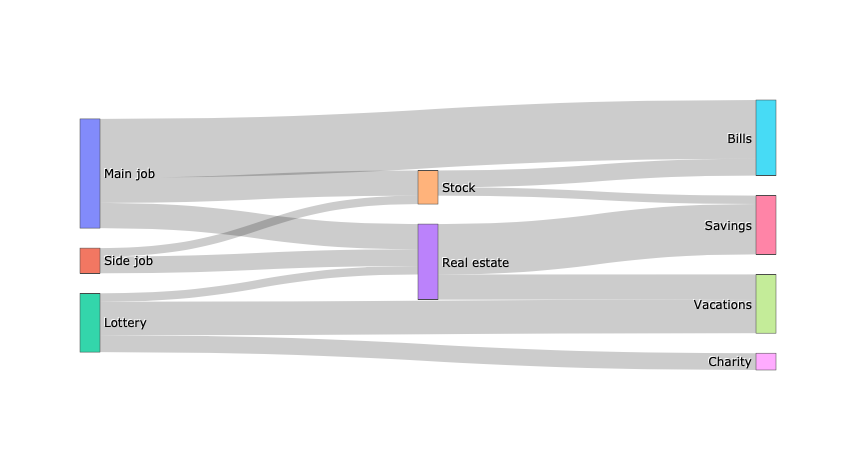

In [35]:
go.Figure(go.Sankey(
    node=dict(
        #       0           1           2          3        4              5        6          7            8
        label=['Main job', 'Side job', 'Lottery', 'Real estate', 'Stock', 'Bills', 'Savings', 'Vacations', 'Charity'],
    ),
    link=dict(
        source=[0, 1, 0, 1, 2, 0, 3, 2, 2, 3, 4, 4],
        target=[3, 3, 4, 4, 3, 5, 7, 7, 8, 6, 5, 6],
        value =[3, 2, 3, 1, 1, 7, 3, 4, 2, 6, 2, 1],
    )
))

This fictional example shows that most of the income from the main job goes towards paying bills, with some significant portion of it going into investments. Real estate investment was more profitable compared to the stock market, and the largest portion of it goes towards savings. Lottery winnings are used mostly for vacations, with a portion going towards charity.

Read more about sankey diagrams [here](https://www.anychart.com/chartopedia/chart-type/sankey-diagram/).

#### Radar

Also known as a spider plot, it shows multiple attributes in a radial manner, highlighting the strengths, weaknesses and overall area of multiple datapoints:

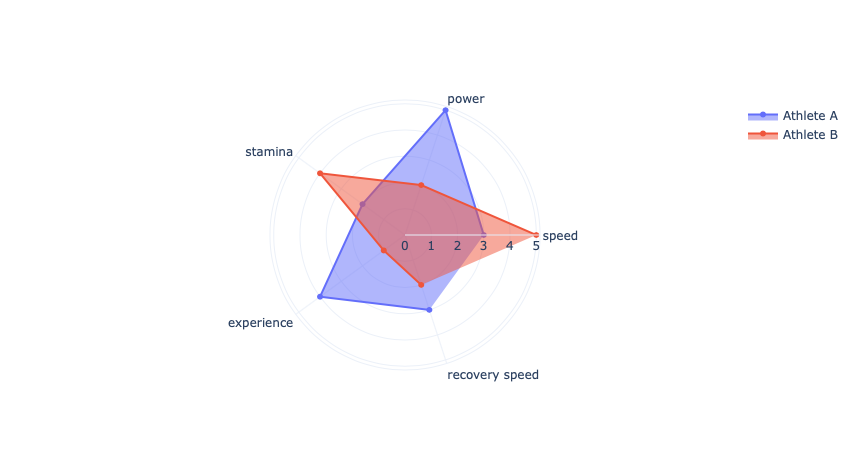

In [36]:
categories = ['speed', 'power', 'stamina', 'experience', 'recovery speed']

go.Figure([
    go.Scatterpolar(
        name='Athlete A',
        r=[3, 5, 2, 4, 3],
        theta=categories,
        fill='toself',
    ),
    
    go.Scatterpolar(
        name='Athlete B',
        r=[5, 2, 4, 1, 2],
        theta=categories,
        fill='toself',
    ),
])

This fictional example highlights _Athlete A's_ strengths, power and experience, compared to _Athlete B_ who focuses on speed and stamina. _Athlete A_ wins in the sum of all attribute ratings (17 vs 14).

#### Distribution plots 

Can include a representation of each datapoint, in the form of a Rug plot, on the margin:

In [37]:
px.histogram(
    px.data.tips(), 
    x='total_bill', y='tip', color='time', 
    marginal='rug', hover_data=df.columns
)

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] but received: iata

See the docs for more examples of [histograms](https://plot.ly/python/histograms/) and [distplots](https://plot.ly/python/distplot/), including  KDE.

---

Boxplots can be easier to interpret when the viewer is able to mouse over and see what each point represents, rather than relying on memory:

In [ ]:
px.box(
    px.data.tips(),
    x='day', y='total_bill', color='smoker'
)

The same kind of information can be displayed upon hovering a Violin plot:

In [ ]:
df = px.data.tips()
smokers = (df.smoker == 'Yes')

go.Figure([
    go.Violin(
        x=df.day[~smokers],
        y=df.total_bill[~smokers],
        side='negative',
        name='Non-smokers'
    ),
    go.Violin(
        x=df.day[smokers],
        y=df.total_bill[smokers],
        side='positive',
        name='Smokers'
    )
])

See the docs for more variations of [Boxplots](https://plot.ly/python/box-plots/) and [Violin plots](https://plot.ly/python/violin/).

---

Similar to how Seaborn is to matplotlib, Plotly Express it to Plotly. It provides shortcuts for quick compositing of charts:

In [ ]:
px.scatter(
    px.data.tips(),
    x='total_bill', y='tip', color='time', 
    marginal_x='box', marginal_y='histogram',
    trendline='ols'
)

See [the docs](https://plot.ly/python/plotly-express/) for more examples.

### 3D charts

In order to effectively observe data across $n$ dimensions, we need to plot in over $n+1$ dimensions:
1. One dimensional data (numbers) can be plotted along a single line, which has two dimensions.
2. Two dimensional data can be plotted on a coordinate system (as a scatter, line, bar, etc chart). The hidden third dimension is the location of points. The entirety of the chart can be observed at once.
3. Three dimensional data can only be consumed two-dimensions at a time, whether represented on a computer display, a piece of paper, or a 3D representation. The observer needs to observe the graphical representation from multiple angles in order to perceive all three dimensions. The hidden fourth dimension in this case is time.

For this reason static 3D charts fail to communicate insights for most non-trivial data sets. Plotly (and matplotlib, but it is clunkier) allows the rotation of the chart. But most often, it is more efficient to fix one of the axes and plot two 2D traces in relation to it, rather than trying to wrap your head around a 3D representation:

In [ ]:
fig = px.line_3d(x=years, y=price, z=profit)
fig.update_layout(
    height=600, 
    scene=dict(
        xaxis_title='Years',
        yaxis_title='Price',
        zaxis_title='Profit'
    )
)

The data in the 3D chart above is represented much more effectively in a two dimensions:

In [ ]:
go.Figure([
    go.Scatter(x=years, y=price,  name='Price'),
    go.Scatter(x=years, y=profit, name='Profit')
])

---

3D charts can be effective in exploring data in which there is no immediate axis which to set as the default comparison one:

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(
    px.data.iris(), 
    x='sepal_length', y='sepal_width', z='petal_width',
    color='species'
)
fig.update_layout(height=600)

---

While it can be more intuitive to explore a two dimensional distribution as a 3D surface plot, often a heatmap is more effective:

In [ ]:
mountain_elevation = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

In [ ]:
fig = go.Figure(go.Surface(z=mountain_elevation))
fig.update_layout(height=600)

The same data from above is reproduced in a two-dimensional heatmap (equivalent to a view from above on the 3D chart):

In [ ]:
fig = go.Figure(go.Heatmap(z=mountain_elevation))
fig.update_layout(width=450, autosize=False)

See the docs for more [heatmap options](https://plot.ly/python/heatmaps/) and examples of [3D charts](https://plot.ly/python/3d-charts/) but keep in mind the complexity overhead when adding the third dimension.

#### More kinds of charts

Unfortunately, plotly has limited support for hierarchical charts such as [Treemaps](https://plot.ly/python/treemaps/). The [Sunburst chart](https://plot.ly/python/sunburst-charts/), a cousin of the Pie chart, carry all of its shortcomings.

See the docs for more [supported charts](https://plot.ly/python/basic-charts/) including specialized ones:
 - [statistical](https://plot.ly/python/statistical-charts/)
 - [scientific](https://plot.ly/python/scientific-charts/)
 - [financial](https://plot.ly/python/financial-charts/)

https://plot.ly/python/click-events/ click events (segway into dash)

## Further reading

- [from Data to Viz](https://www.data-to-viz.com) discusses various charts — when and how to use them